In [1]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import TensorBoard

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import FinanceDataReader as fdr
import koreanize_matplotlib

In [117]:
import FinanceDataReader as fdr

# KOSPI 상위 25개 종목 리스트
top25 = fdr.StockListing('KOSPI')[:25][['Code', 'Name']]

# 제거할 종목 리스트
remove_list = ['삼성전자', '현대차', 'POSCO홀딩스', '삼성전자우', 'LG전자', 'SK', '카카오', 'NAVER','하이브','신한지주']

# 제거된 종목 제외
top25 = top25[~top25['Name'].isin(remove_list)].reset_index(drop=True)
top25

,Code,Name
0,373220,LG에너지솔루션
1,000660,SK하이닉스
2,207940,삼성바이오로직스
3,051910,LG화학
4,006400,삼성SDI
5,000270,기아
6,003670,포스코퓨처엠
7,068270,셀트리온
8,012330,현대모비스
9,028260,삼성물산


In [118]:
stocks_data = {}
for i, stock_code in enumerate(top25['Code']):
    df = fdr.DataReader(stock_code, '2022-06-12')
    stocks_data[list(top25['Name'])[i]] = df

In [123]:
stocks_data['LG에너지솔루션']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-06-13,414000,420500,413500,415000,267003,-0.023529
2022-06-14,411000,432500,410500,426500,417106,0.027711
2022-06-15,426000,427500,417000,420000,275832,-0.015240
2022-06-16,424500,439500,424500,427000,365836,0.016667
2022-06-17,419500,430000,417000,425500,1211937,-0.003513
...,...,...,...,...,...,...
2023-06-08,601000,602000,588000,591000,286608,-0.021523
2023-06-09,597000,610000,597000,609000,449434,0.030457
2023-06-12,614000,614000,603000,612000,231274,0.004926


In [124]:
target_data = ['LG에너지솔루션','SK하이닉스', '삼성바이오로직스', 'LG화학', '삼성SDI', '기아', '포스코퓨처엠', '셀트리온', '현대모비스', '삼성물산', 'KB금융', 'SK이노베이션', 'LG', '삼성생명', '카카오뱅크']

In [125]:
len(target_data)

15

In [131]:
ans = {}
for i in target_data:
    df = pd.read_csv('./Top25_news_감정상태/%s.csv'%i)
    df['Date'] = pd.to_datetime(df['Date'])
    daily_data = df.groupby(df['Date'].dt.date)['Emotion'].apply(lambda x: x.value_counts().index[0])
    daily_data = daily_data.reset_index()
    # Rename the columns
    daily_data.columns = ['Date', 'Emotion']
    stocks_data[i] = stocks_data[i].reset_index()
    stocks_data[i]['Emotion']=0
    target = stocks_data[i]
    daily_data['Date'] = pd.to_datetime(daily_data['Date'])
    target['Date'] = pd.to_datetime(target['Date'])
    merged_data = pd.merge(target, daily_data, on='Date', how='left')
    merged_data['Emotion'] = merged_data['Emotion_y'].fillna(0)
    merged_data.drop('Emotion_y', axis=1, inplace=True)
    merged_data.drop('Emotion_x', axis=1, inplace=True)
    merged_data = merged_data.astype({'Emotion':'int'})
    ans[i] = merged_data

In [132]:
for ticker, df in ans.items():
    df.set_index('Date', inplace=True)

In [133]:
ans['LG에너지솔루션']

,index,Open,High,Low,Close,Volume,Change,Emotion
Date,,,,,,,,
2022-06-13,0,414000,420500,413500,415000,267003,-0.023529,1
2022-06-14,1,411000,432500,410500,426500,417106,0.027711,1
2022-06-15,2,426000,427500,417000,420000,275832,-0.015240,1
2022-06-16,3,424500,439500,424500,427000,365836,0.016667,0
2022-06-17,4,419500,430000,417000,425500,1211937,-0.003513,0
...,...,...,...,...,...,...,...,...
2023-06-08,245,601000,602000,588000,591000,286608,-0.021523,1
2023-06-09,246,597000,610000,597000,609000,449434,0.030457,1
2023-06-12,247,614000,614000,603000,612000,231274,0.004926,0


In [134]:
ans.keys()

dict_keys(['LG에너지솔루션', 'SK하이닉스', '삼성바이오로직스', 'LG화학', '삼성SDI', '기아', '포스코퓨처엠', '셀트리온', '현대모비스', '삼성물산', 'KB금융', 'SK이노베이션', 'LG', '삼성생명', '카카오뱅크'])

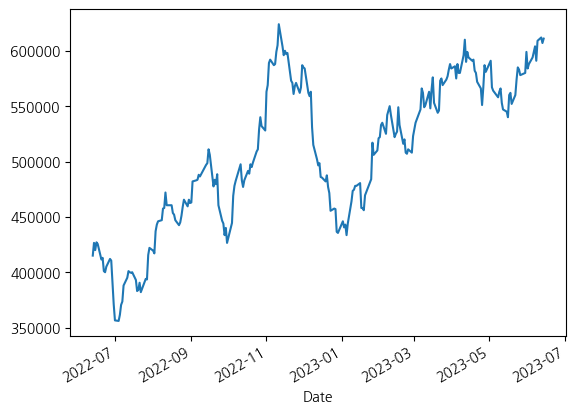

In [138]:
ans['LG에너지솔루션']['Close'].plot();

In [69]:
ans['LG에너지솔루션']

,Open,High,Low,Close,Volume,Change,Emotion
Date,,,,,,,
2022-06-13,414000,420500,413500,415000,267003,-0.023529,1
2022-06-14,411000,432500,410500,426500,417106,0.027711,1
2022-06-15,426000,427500,417000,420000,275832,-0.015240,1
2022-06-16,424500,439500,424500,427000,365836,0.016667,0
2022-06-17,419500,430000,417000,425500,1211937,-0.003513,0
...,...,...,...,...,...,...,...
2023-06-07,597000,605000,597000,604000,498286,0.016835,1
2023-06-08,601000,602000,588000,591000,286608,-0.021523,1
2023-06-09,597000,610000,597000,609000,449434,0.030457,1


In [70]:
test = ans.copy()

In [71]:
test['LG에너지솔루션'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2022-06-13 to 2023-06-13
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     249 non-null    int64  
 1   High     249 non-null    int64  
 2   Low      249 non-null    int64  
 3   Close    249 non-null    int64  
 4   Volume   249 non-null    int64  
 5   Change   249 non-null    float64
 6   Emotion  249 non-null    int32  
dtypes: float64(1), int32(1), int64(5)
memory usage: 14.6 KB


# train, valid, test 데이터셋 나누기

In [142]:
# 전체 데이터 셋의 80프로 
TRAIN_SPLIT = 0.8  

# 나머지 데이터 셋의 40프로 
VAL_TEST_SPLIT = 0.4  

total_count = len(ans[list(ans.keys())[0]])
train_count = int(total_count * TRAIN_SPLIT)
left = total_count - train_count
valid_count = int(left * VAL_TEST_SPLIT)
test_count = int(left - valid_count)

print(sum([train_count, valid_count, test_count]))
total_count, train_count, valid_count, test_count

250


(250, 200, 20, 30)

In [143]:
pick_columns = {'Open', 'High', 'Low', 'Close', 'Volume', 'Change','Emotion'}

y_column = {'Close'}
x_columns = pick_columns - y_column

In [144]:
# 각 주식 종목의 x, y, x_train, y_train, x_valid, y_valid, x_test, y_test 값 저장
 
for i, (ticker, df) in enumerate(ans.items()):
    new_data = pd.DataFrame(df, columns=list(pick_columns)).interpolate(limit_direction='both')
    x_df = pd.DataFrame(new_data, columns=list(x_columns))
    y_df = pd.DataFrame(new_data, columns=list(y_column))

    # 딕션너리 형태로 저장 
    ans[ticker] = {
        'x': x_df, 'y': y_df,
        'x_train': x_df[0:train_count], 'y_train': y_df[0:train_count],
        'x_valid': x_df[train_count:train_count+valid_count], 'y_valid': y_df[train_count:train_count+valid_count],
        'x_test': x_df[train_count+valid_count:], 'y_test': y_df[train_count+valid_count:],
        'new_data': new_data

        }

In [145]:
ans['LG에너지솔루션']['x']

,Low,Emotion,Volume,Open,Change,High
Date,,,,,,
2022-06-13,413500,1,267003,414000,-0.023529,420500
2022-06-14,410500,1,417106,411000,0.027711,432500
2022-06-15,417000,1,275832,426000,-0.015240,427500
2022-06-16,424500,0,365836,424500,0.016667,439500
2022-06-17,417000,0,1211937,419500,-0.003513,430000
...,...,...,...,...,...,...
2023-06-08,588000,1,286608,601000,-0.021523,602000
2023-06-09,597000,1,449434,597000,0.030457,610000
2023-06-12,603000,0,231274,614000,0.004926,614000


In [146]:
ans['LG에너지솔루션']['y']

,Close
Date,
2022-06-13,415000
2022-06-14,426500
2022-06-15,420000
2022-06-16,427000
2022-06-17,425500
...,...
2023-06-08,591000
2023-06-09,609000
2023-06-12,612000


In [152]:
from numpy import hstack
from keras.utils import timeseries_dataset_from_array
from keras.preprocessing.sequence import TimeseriesGenerator

for i, (ticker, ds) in enumerate(ans.items()):
    x_series = []
    y_series = []
    x_train_series = []
    y_train_series = []
    x_valid_series = []
    y_valid_series = []
    x_test_series = []
    y_test_series = []
    
    # 값만 저장 
    ds['x_values'] = ds['x'].values
    ds['y_values'] = ds['y'].values
    
    ds['x_train_values'] = ds['x_train'].values
    ds['y_train_values'] = ds['y_train'].values
    
    ds['x_valid_values'] = ds['x_valid'].values
    ds['y_valid_values'] = ds['y_valid'].values
    
    ds['x_test_values'] = ds['x_test'].values
    ds['y_test_values'] = ds['y_test'].values
    
    # 생성된 값 리스트에 더하기 
    x_series.append(ds['x_values'])
    y_series.append(ds['y_values'])
    
    x_train_series.append(ds['x_train_values'])
    y_train_series.append(ds['y_train_values'])
    
    x_valid_series.append(ds['x_valid_values'])
    y_valid_series.append(ds['y_valid_values'])
    
    x_test_series.append(ds['x_test_values'])
    y_test_series.append(ds['y_test_values'])
    

    x_dataset = hstack(tuple(x_series))
    y_dataset = hstack(tuple(y_series))

    x_train_dataset = hstack(tuple(x_train_series))
    y_train_dataset = hstack(tuple(y_train_series))

    x_valid_dataset = hstack(tuple(x_valid_series))
    y_valid_dataset = hstack(tuple(y_valid_series))

    x_test_dataset = hstack(tuple(x_test_series))
    y_test_dataset = hstack(tuple(y_test_series))

    # MinMax 스케일링 정용 
    x_scaler = MinMaxScaler(feature_range=(0, 1))
    y_scaler = MinMaxScaler(feature_range=(0, 1))

    x_dataset = x_scaler.fit_transform(x_dataset)
    y_dataset = y_scaler.fit_transform(y_dataset)
    
    # Scale train and validation datasets
    x_train_dataset = x_scaler.transform(x_train_dataset)
    y_train_dataset = y_scaler.transform(y_train_dataset)

    x_valid_dataset = x_scaler.transform(x_valid_dataset)
    y_valid_dataset = y_scaler.transform(y_valid_dataset)

    x_test_dataset = x_scaler.transform(x_test_dataset)
    y_test_dataset = y_scaler.transform(y_test_dataset)
    
    ds['x_train_dataset'] = x_train_dataset
    ds['y_train_dataset'] = y_train_dataset
    
    ds['x_valid_dataset'] = x_valid_dataset
    ds['y_valid_dataset'] = y_valid_dataset
    
    ds['x_test_dataset'] = x_test_dataset
    ds['y_test_dataset'] = y_test_dataset

    # Store feature scalers
    ds['x_scaler'] = x_scaler
    ds['y_scaler'] = y_scaler

    print('*' * 5 + 'Train shapes for ' + ticker)
    print(x_train_dataset.shape, y_train_dataset.shape) 
    
    print('*' * 5 + 'Validation shapes for ' + ticker)
    print(x_valid_dataset.shape, y_valid_dataset.shape)
    
    print('*' * 5 + 'Test shapes for ' + ticker)
    print(x_test_dataset.shape, y_test_dataset.shape)

*****Train shapes for LG에너지솔루션
(200, 6) (200, 1)
*****Validation shapes for LG에너지솔루션
(20, 6) (20, 1)
*****Test shapes for LG에너지솔루션
(30, 6) (30, 1)
*****Train shapes for SK하이닉스
(200, 6) (200, 1)
*****Validation shapes for SK하이닉스
(20, 6) (20, 1)
*****Test shapes for SK하이닉스
(30, 6) (30, 1)
*****Train shapes for 삼성바이오로직스
(200, 6) (200, 1)
*****Validation shapes for 삼성바이오로직스
(20, 6) (20, 1)
*****Test shapes for 삼성바이오로직스
(30, 6) (30, 1)
*****Train shapes for LG화학
(200, 6) (200, 1)
*****Validation shapes for LG화학
(20, 6) (20, 1)
*****Test shapes for LG화학
(30, 6) (30, 1)
*****Train shapes for 삼성SDI
(200, 6) (200, 1)
*****Validation shapes for 삼성SDI
(20, 6) (20, 1)
*****Test shapes for 삼성SDI
(30, 6) (30, 1)
*****Train shapes for 기아
(200, 6) (200, 1)
*****Validation shapes for 기아
(20, 6) (20, 1)
*****Test shapes for 기아
(30, 6) (30, 1)
*****Train shapes for 포스코퓨처엠
(200, 6) (200, 1)
*****Validation shapes for 포스코퓨처엠
(20, 6) (20, 1)
*****Test shapes for 포스코퓨처엠
(30, 6) (30, 1)
*****Train shapes for 

In [153]:
window_length = 1
BATCH_SIZE = 1

for i, (ticker, ds) in enumerate(ans.items()):
    x_train_dataset = ds['x_train_dataset']
    y_train_dataset = ds['y_train_dataset']
    
    x_valid_dataset = ds['x_valid_dataset']
    y_valid_dataset = ds['y_valid_dataset']
    
    x_test_dataset = ds['x_test_dataset']
    y_test_dataset = ds['y_test_dataset']
    
    train_generator = TimeseriesGenerator(x_train_dataset, y_train_dataset, length=window_length, batch_size=BATCH_SIZE)
    print('Train samples for {}: {}'.format(ticker, len(train_generator)))

    valid_generator = TimeseriesGenerator(x_valid_dataset, y_valid_dataset, length=window_length, batch_size=BATCH_SIZE)
    print('Validation samples for {}: {}'.format(ticker, len(valid_generator)))

    test_generator = TimeseriesGenerator(x_test_dataset, y_test_dataset, length=window_length, batch_size=BATCH_SIZE)
    print('Test samples for {}: {}'.format(ticker, len(test_generator)))
    
    ds['train_generator'] = train_generator
    ds['valid_generator'] = valid_generator
    ds['test_generator'] = test_generator

Train samples for LG에너지솔루션: 199
Validation samples for LG에너지솔루션: 19
Test samples for LG에너지솔루션: 29
Train samples for SK하이닉스: 199
Validation samples for SK하이닉스: 19
Test samples for SK하이닉스: 29
Train samples for 삼성바이오로직스: 199
Validation samples for 삼성바이오로직스: 19
Test samples for 삼성바이오로직스: 29
Train samples for LG화학: 199
Validation samples for LG화학: 19
Test samples for LG화학: 29
Train samples for 삼성SDI: 199
Validation samples for 삼성SDI: 19
Test samples for 삼성SDI: 29
Train samples for 기아: 199
Validation samples for 기아: 19
Test samples for 기아: 29
Train samples for 포스코퓨처엠: 199
Validation samples for 포스코퓨처엠: 19
Test samples for 포스코퓨처엠: 29
Train samples for 셀트리온: 199
Validation samples for 셀트리온: 19
Test samples for 셀트리온: 29
Train samples for 현대모비스: 199
Validation samples for 현대모비스: 19
Test samples for 현대모비스: 29
Train samples for 삼성물산: 199
Validation samples for 삼성물산: 19
Test samples for 삼성물산: 29
Train samples for KB금융: 199
Validation samples for KB금융: 19
Test samples for KB금융: 29
Train samples for 

In [79]:
count = 0

for i, (ticker, ds) in enumerate(ans.items()):
    train_generator = ds['train_generator']
    valid_generator = ds['valid_generator']
    test_generator = ds['test_generator']

    x_scaler = ds['x_scaler']
    y_scaler = ds['y_scaler']

    OUTPUT_SIZE = 1

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(window_length, OUTPUT_SIZE * len(x_columns))))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(OUTPUT_SIZE))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # fit
    model.fit(train_generator)

    # val_loss = model.evaluate_generator(valid_generator)
    # print('Val loss for {}: {}'.format(ticker, val_loss))

    
    # Make test predictions
    test_predict = model.predict_generator(test_generator)
    predicted_df = pd.DataFrame(y_scaler.inverse_transform(test_predict))
    predicted_df = predicted_df.rename(columns={0: ticker})
    
    original_test = ans[ticker]['y_test'].iloc[window_length:]
    predicted_df.index = original_test.index
    
    if count > 0:
        predicted_ticker = pd.concat([predicted_df[ticker], predicted_ticker], axis=1)
    else: 
        predicted_ticker = predicted_df[ticker]
        
    count += 1

198/198 [==============================] - 6s 4ms/step - loss: 0.0679


C:\Users\dong_\AppData\Local\Temp\ipykernel_42820\1173966349.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


198/198 [==============================] - 7s 5ms/step - loss: 0.0195


C:\Users\dong_\AppData\Local\Temp\ipykernel_42820\1173966349.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


198/198 [==============================] - 7s 4ms/step - loss: 0.0654


C:\Users\dong_\AppData\Local\Temp\ipykernel_42820\1173966349.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


198/198 [==============================] - 7s 4ms/step - loss: 0.0420


C:\Users\dong_\AppData\Local\Temp\ipykernel_42820\1173966349.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


198/198 [==============================] - 6s 4ms/step - loss: 0.0514


C:\Users\dong_\AppData\Local\Temp\ipykernel_42820\1173966349.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


198/198 [==============================] - 5s 4ms/step - loss: 0.0492


C:\Users\dong_\AppData\Local\Temp\ipykernel_42820\1173966349.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


198/198 [==============================] - 6s 4ms/step - loss: 0.0167


C:\Users\dong_\AppData\Local\Temp\ipykernel_42820\1173966349.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


198/198 [==============================] - 5s 4ms/step - loss: 0.0438


C:\Users\dong_\AppData\Local\Temp\ipykernel_42820\1173966349.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


198/198 [==============================] - 5s 4ms/step - loss: 0.0399


C:\Users\dong_\AppData\Local\Temp\ipykernel_42820\1173966349.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


198/198 [==============================] - 6s 4ms/step - loss: 0.0831


C:\Users\dong_\AppData\Local\Temp\ipykernel_42820\1173966349.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


198/198 [==============================] - 6s 4ms/step - loss: 0.0442


C:\Users\dong_\AppData\Local\Temp\ipykernel_42820\1173966349.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


198/198 [==============================] - 6s 4ms/step - loss: 0.0363


C:\Users\dong_\AppData\Local\Temp\ipykernel_42820\1173966349.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


198/198 [==============================] - 6s 4ms/step - loss: 0.0291


C:\Users\dong_\AppData\Local\Temp\ipykernel_42820\1173966349.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


198/198 [==============================] - 6s 4ms/step - loss: 0.0546


C:\Users\dong_\AppData\Local\Temp\ipykernel_42820\1173966349.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


198/198 [==============================] - 6s 4ms/step - loss: 0.0566


C:\Users\dong_\AppData\Local\Temp\ipykernel_42820\1173966349.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


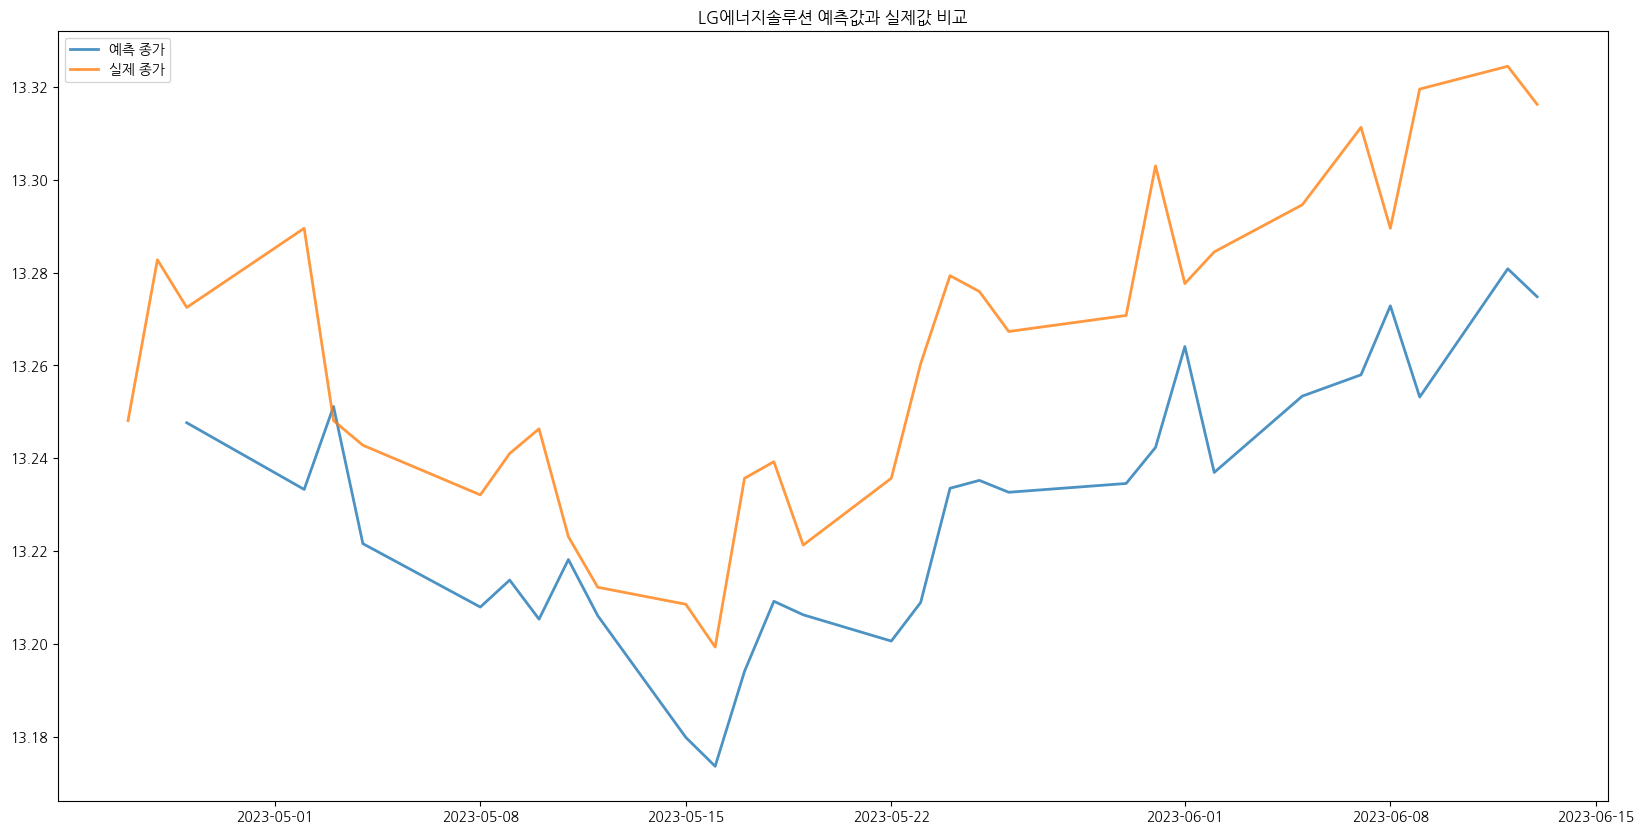

In [88]:
# 예측 데이터와 실제 데이터값 비교 
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.plot(np.log(predicted_ticker['LG에너지솔루션']), linewidth=2, alpha=0.8, label='예측 종가')
plt.plot(np.log(ans['LG에너지솔루션']['y'][ans['LG에너지솔루션']['y'].index > '2023-04-25']),
         linewidth=2, alpha=0.8, label='실제 종가')
plt.legend()
plt.title('LG에너지솔루션 예측값과 실제값 비교')
plt.show()

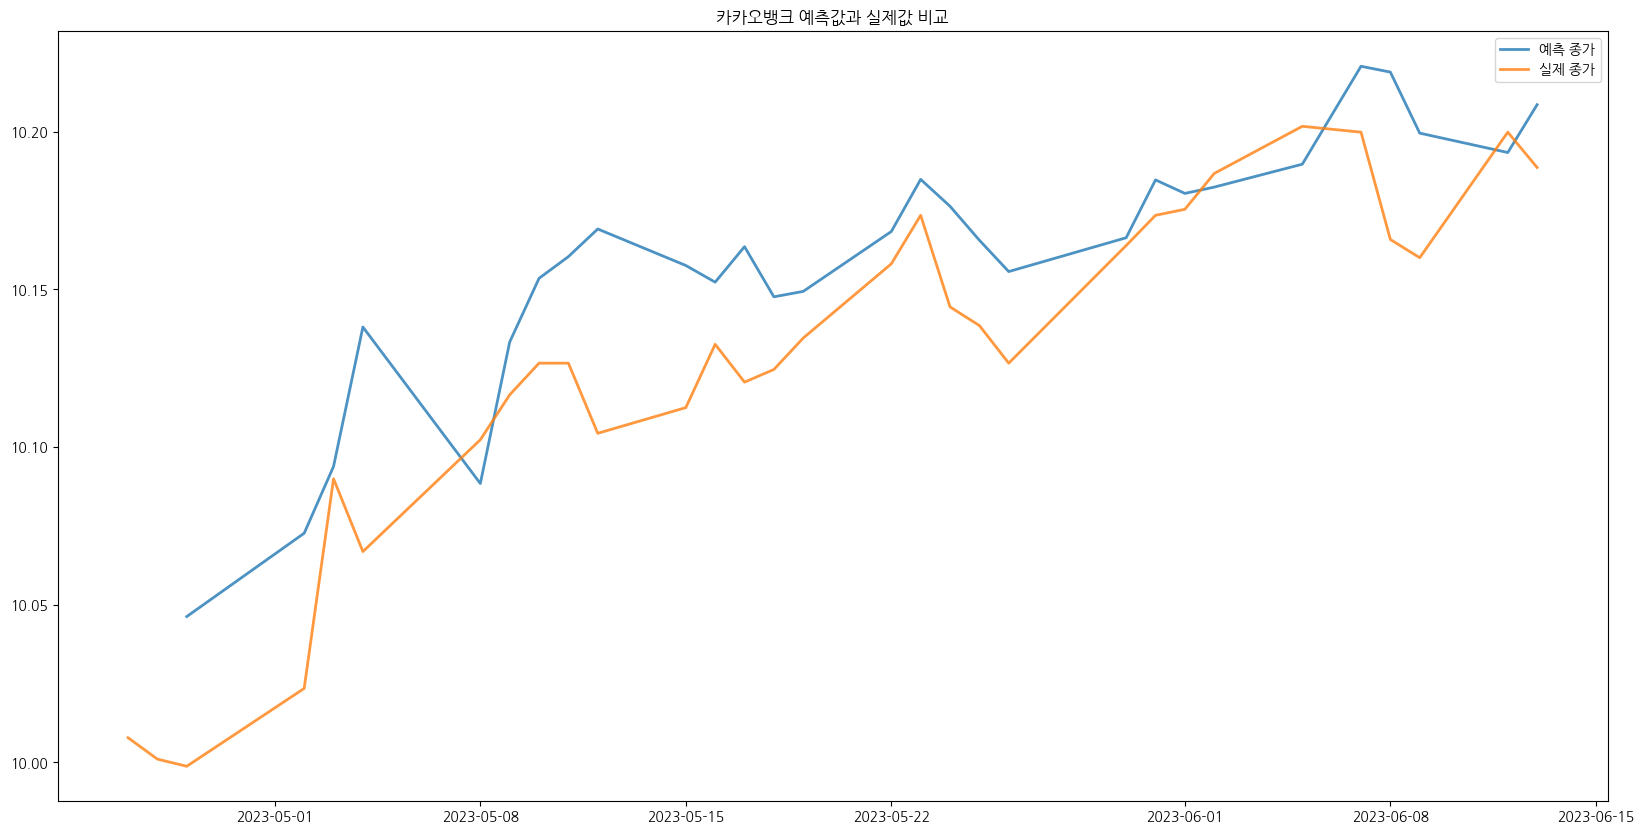

In [83]:
# 예측 데이터와 실제 데이터값 비교 
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.plot(np.log(predicted_ticker['카카오뱅크']), linewidth=2, alpha=0.8, label='예측 종가')
plt.plot(np.log(ans['카카오뱅크']['y'][ans['카카오뱅크']['y'].index > '2023-04-25']),
         linewidth=2, alpha=0.8, label='실제 종가')
plt.legend()
plt.title('카카오뱅크 예측값과 실제값 비교')
plt.show()

In [84]:
# 1년치 감정분석으로는 모델을 설정하기 쉽지 않음 
predicted_ticker.to_csv('주식_예측값.csv')

In [98]:
predicted_ticker

,카카오뱅크,삼성생명,LG,SK이노베이션,KB금융,삼성물산,현대모비스,셀트리온,포스코퓨처엠,기아,삼성SDI,LG화학,삼성바이오로직스,SK하이닉스,LG에너지솔루션
Date,,,,,,,,,,,,,,,
2023-04-28,23069.794922,64596.570312,84370.265625,172623.546875,48836.707031,111059.054688,217940.937500,165607.015625,296336.000000,83569.148438,689985.6875,721863.0625,798559.8125,89041.062500,566740.6250
2023-05-02,23687.597656,65744.687500,84364.343750,172955.140625,49826.007812,112061.867188,215209.859375,165026.078125,297998.625000,82585.164062,689707.6250,716770.5625,800555.9375,90237.515625,558657.6875
2023-05-03,24194.460938,66489.015625,84628.953125,173434.546875,48960.531250,112280.460938,217670.500000,166112.078125,302546.843750,82498.515625,689423.8125,723499.2500,796724.9375,89994.343750,568727.6250
2023-05-04,25287.992188,66338.523438,85216.867188,172554.562500,48574.976562,111515.687500,216320.171875,164936.734375,296003.531250,82336.429688,676091.3125,703886.5000,800511.3125,88988.125000,552164.0000
2023-05-08,24063.888672,66436.023438,85327.539062,173341.828125,48816.074219,111489.093750,216062.625000,167396.687500,294261.000000,82052.953125,674167.5625,700905.5625,811363.6250,88576.476562,544670.4375
2023-05-09,25167.878906,66480.632812,86350.312500,178849.046875,49166.675781,111699.078125,217352.656250,168127.671875,288931.125000,83120.648438,668865.0625,708913.9375,807518.2500,89147.820312,547847.5000
2023-05-10,25681.421875,66313.257812,86629.257812,179149.859375,48951.781250,112957.578125,217277.953125,174067.734375,276833.406250,82852.078125,671498.9375,699049.0625,805523.2500,88180.078125,543249.7500
2023-05-11,25859.003906,66603.773438,86997.546875,176087.984375,48749.472656,112018.546875,219691.656250,171341.640625,262680.968750,84251.593750,663226.8750,685296.4375,801877.8125,87971.773438,550276.3750
2023-05-12,26086.517578,67129.226562,86914.476562,173850.125000,49534.785156,113275.960938,222648.531250,171389.718750,264950.468750,85495.312500,665821.3125,684760.1875,802720.6875,87687.078125,543659.3125


In [97]:
ans

{'LG에너지솔루션': {'x':                Low  Emotion   Volume    Open    Change    High
  Date                                                          
  2022-06-13  413500        1   267003  414000 -0.023529  420500
  2022-06-14  410500        1   417106  411000  0.027711  432500
  2022-06-15  417000        1   275832  426000 -0.015240  427500
  2022-06-16  424500        0   365836  424500  0.016667  439500
  2022-06-17  417000        0  1211937  419500 -0.003513  430000
  ...            ...      ...      ...     ...       ...     ...
  2023-06-07  597000        1   498286  597000  0.016835  605000
  2023-06-08  588000        1   286608  601000 -0.021523  602000
  2023-06-09  597000        1   449434  597000  0.030457  610000
  2023-06-12  603000        0   231274  614000  0.004926  614000
  2023-06-13  604000        0   192351  612000 -0.008170  613000
  
  [249 rows x 6 columns],
  'y':              Close
  Date              
  2022-06-13  415000
  2022-06-14  426500
  2022-06-15  420000

In [116]:
import numpy as np

# 예측 결과와 실제 데이터를 가져옴
predicted_data = predicted_ticker[ticker].values.flatten()
actual_data = stocks_data['Close'].values[-len(predicted_data):]

# 평균 오차 계산
mean_error = np.mean(predicted_data - actual_data)

# 표준 편차 계산
std_deviation = np.std(predicted_data - actual_data)

# 최대/최소 오차 계산
max_error = np.max(predicted_data - actual_data)
min_error = np.min(predicted_data - actual_data)

# 평균 제곱근 오차 (RMSE) 계산
rmse = np.sqrt(np.mean((predicted_data - actual_data) ** 2))

# 평균 절대 백분율 오차 (MAPE) 계산
mape = np.mean(np.abs((predicted_data - actual_data) / actual_data)) * 100

# 결과 출력
print('Mean Error:', mean_error)
print('Standard Deviation:', std_deviation)
print('Max Error:', max_error)
print('Min Error:', min_error)
print('RMSE:', rmse)
print('MAPE:', mape)



KeyError: 'Close'

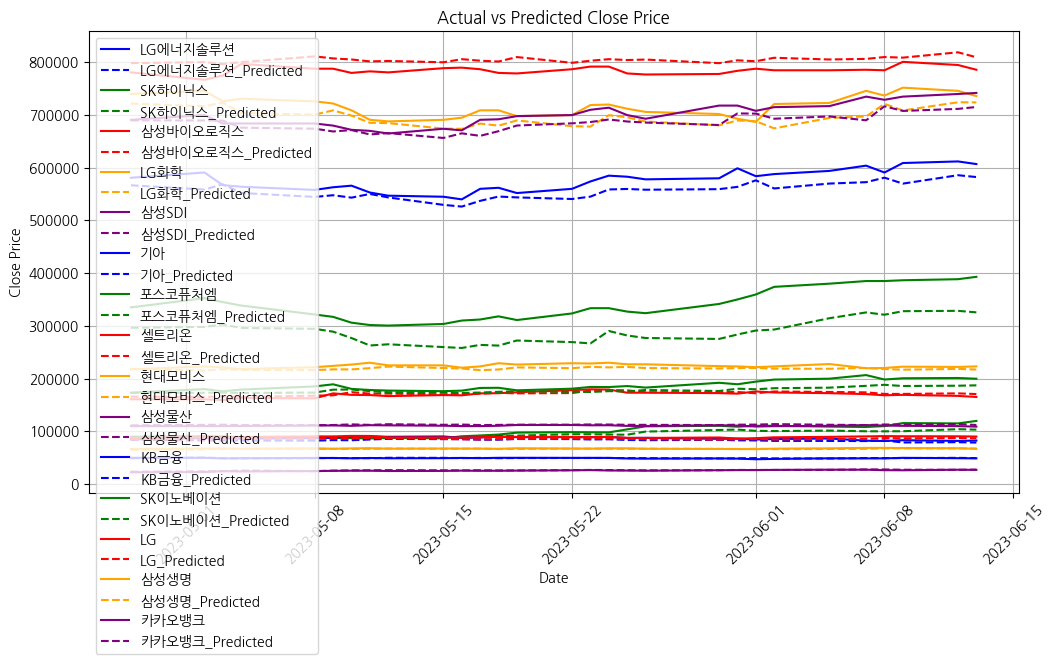

In [102]:
import matplotlib.pyplot as plt

# 예측 데이터
predicted_dates = predicted_ticker.index
predicted_data = predicted_ticker.values

# 실제 데이터
actual_data = {}
for ticker, ds in ans.items():
    actual_data[ticker] = ds['y'].loc[predicted_dates].values.flatten()

# 색상 설정
colors = ['blue', 'green', 'red', 'orange', 'purple']

# 그래프 그리기
plt.figure(figsize=(12, 6))
for i, (ticker, data) in enumerate(actual_data.items()):
    plt.plot(predicted_dates, data, label=ticker, color=colors[i % len(colors)])
    if ticker in predicted_ticker.columns:
        pred_label = ticker + '_Predicted'
        pred_data = predicted_ticker[ticker]
        plt.plot(predicted_dates, pred_data, label=pred_label, linestyle='--', color=colors[i % len(colors)])

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
